<a href="https://colab.research.google.com/github/Aman-prog2000/LGMVIP-DataScience/blob/main/Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
print("Necessary packages included successfully!")

Necessary packages included successfully!


In [ ]:
df = pd.read_csv("/content/Iris.csv")

In [ ]:
df.rename(columns={"Unnamed: 0":"Id", "Sepal.Length":"SepalLengthCm", "Sepal.Width":"SepalWidthCm", "Petal.Length":"PetalLengthCm", "Petal.Width":"PetalWidthCm" },inplace=True)

In [ ]:
df


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

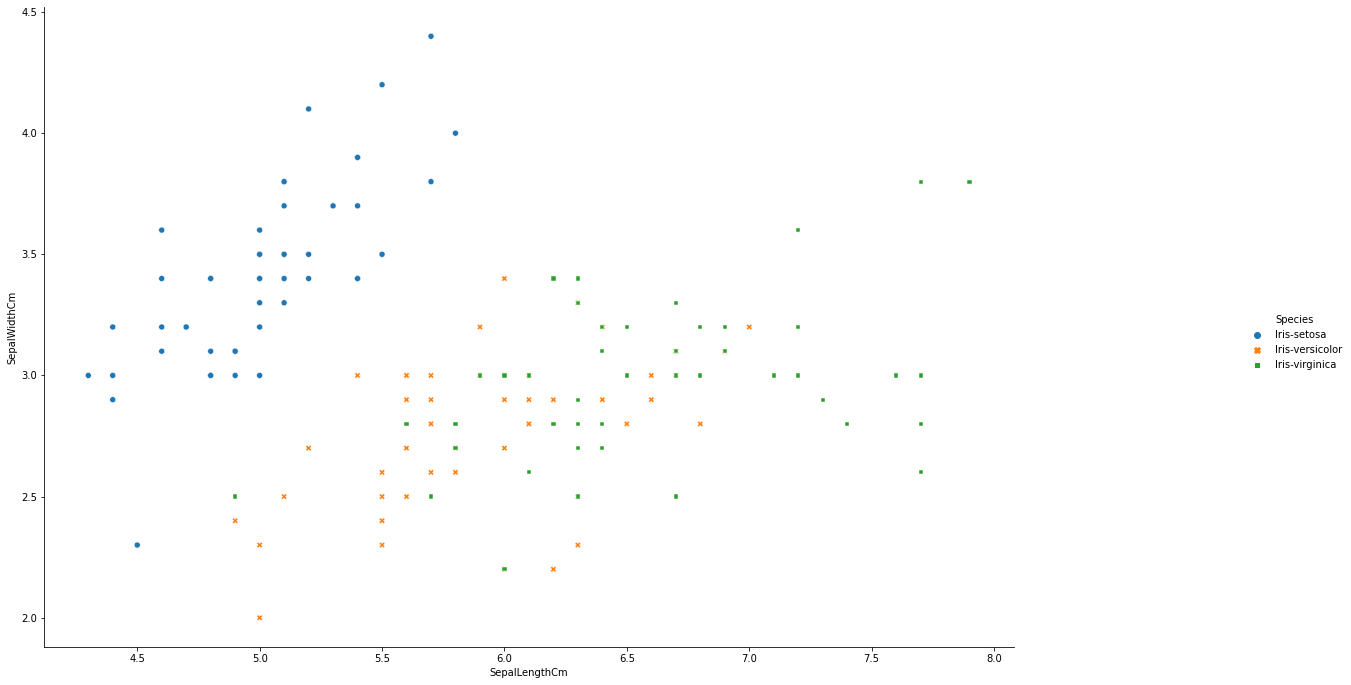

In [ ]:
g=sns.relplot(x='SepalLengthCm',y='SepalWidthCm',data=df,hue='Species',style='Species')
g.fig.set_size_inches(20,10)
plt.show()

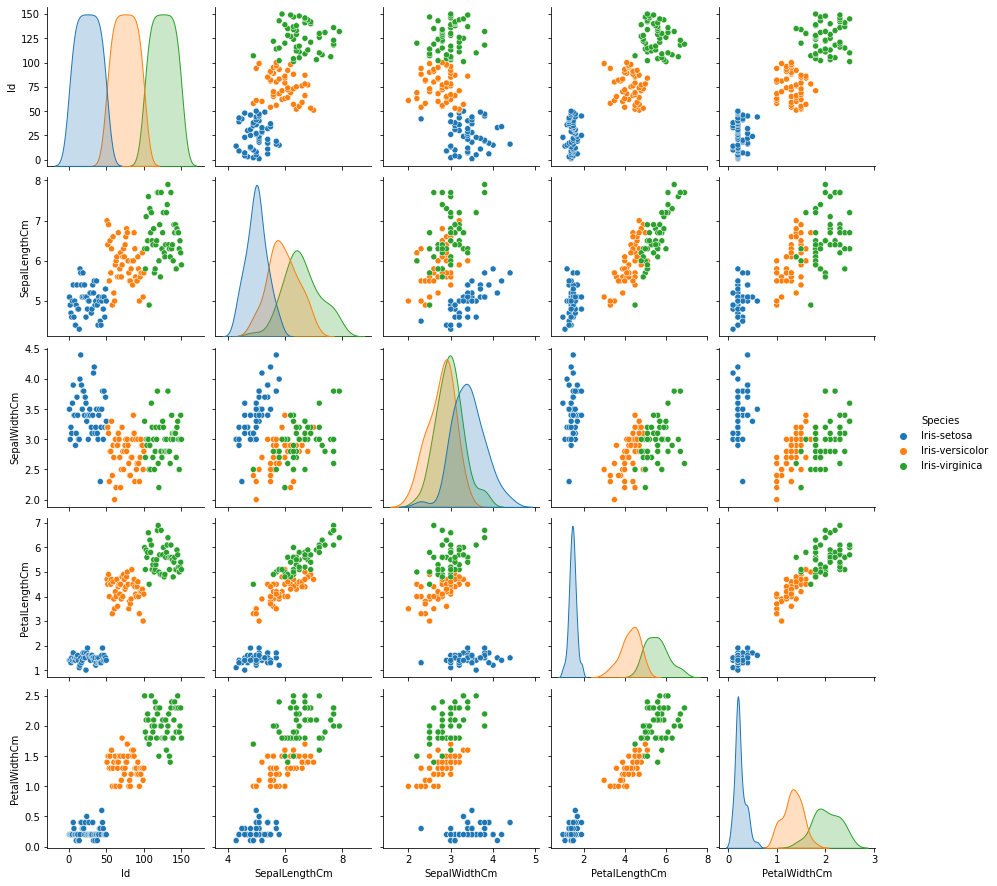

In [ ]:
sns.pairplot(df,hue='Species')
plt.show()

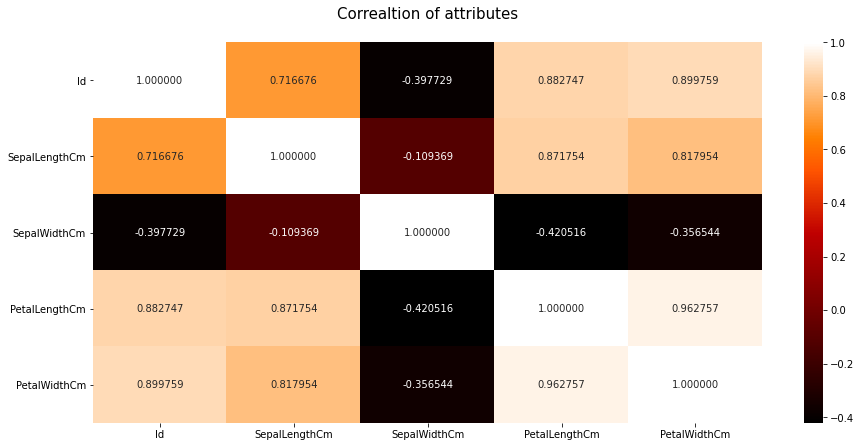

In [ ]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True,fmt='f',cmap='gist_heat').set_title('Correaltion of attributes\n',size=15)
plt.show()

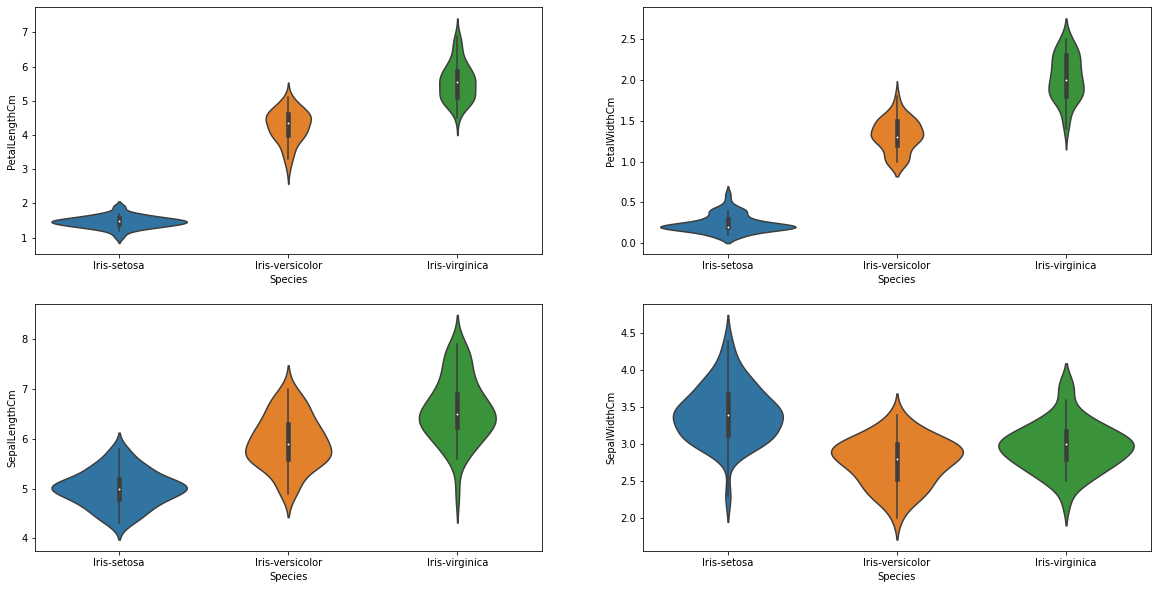

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='PetalLengthCm',data=df)
plt.subplot(2,2,2)
sns.violinplot(x='Species',y='PetalWidthCm',data=df)
plt.subplot(2,2,3)
sns.violinplot(x='Species',y='SepalLengthCm',data=df)
plt.subplot(2,2,4)
sns.violinplot(x='Species',y='SepalWidthCm',data=df)
plt.show()

In [ ]:
X = df.iloc[:,0:4].values
y = df.iloc[:,4].values
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
from sklearn.metrics import make_scorer,accuracy_score,precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [ ]:
from sklearn.model_selection import KFold,train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(105, 4)
(45, 4)
(105,)
(45,)


Random Forest


In [ ]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
acc_rf = round(accuracy_score(y_test,y_pred)*100,2)
rf_acc = round(rf.score(X_train,y_train)*100,2)
cm = confusion_matrix(y_test,y_pred)
acc = accuracy_score(y_test,y_pred)

KNN model

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
acc_knn = round(accuracy_score(y_test,y_pred)*100,2)
knn_acc = round(knn.score(X_train,y_train)*100,2)
cm = confusion_matrix(y_test,y_pred)
acc = accuracy_score(y_test,y_pred)


Descision tree

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
acc_dt = round(accuracy_score(y_test,y_pred)*100,2)
dt_acc = round(dt.score(X_train,y_train)*100,2)
cm = confusion_matrix(y_test,y_pred)
acc = accuracy_score(y_test,y_pred)


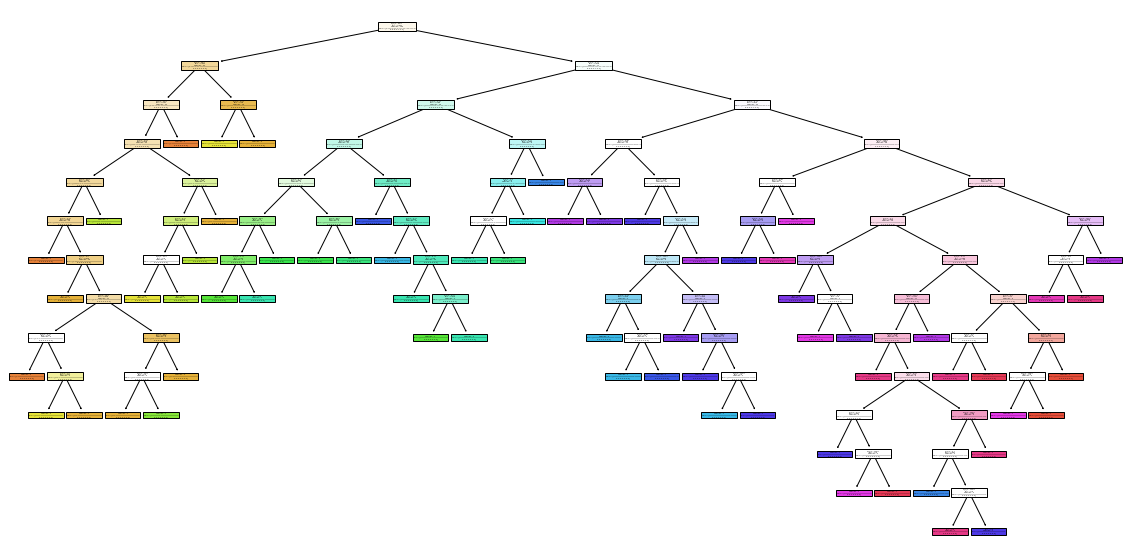

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(dt.fit(X_train,y_train),filled=True)
plt.show()

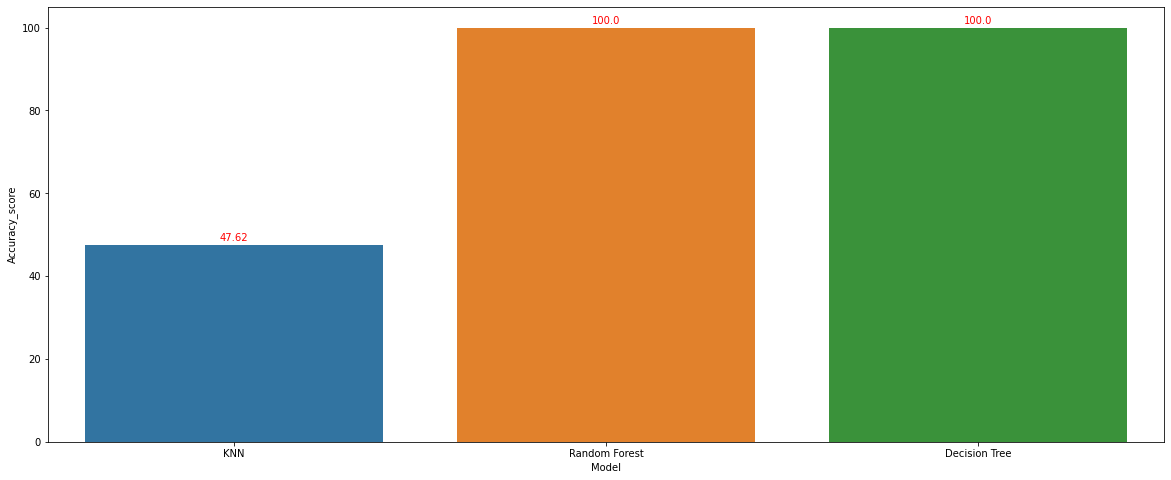

In [ ]:
res = pd.DataFrame(
    {
        'Model':['KNN','Random Forest','Decision Tree'],
     'Score':[acc_knn,acc_rf,acc_dt],
     'Accuracy_score':[knn_acc,rf_acc,dt_acc]
    }
)


res
plt.figure(figsize=(20,8))
ax = sns.barplot(x='Model',y='Accuracy_score',data=res)
labels = (res['Accuracy_score'])
for i,v in enumerate(labels):
  ax.text(i,v+1,str(v),horizontalalignment='center',color='Red')

This Dataset is predicted well using the Random forest and Decision Tree Classifier. 